/tmp/ipykernel_3200940/1473733102.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


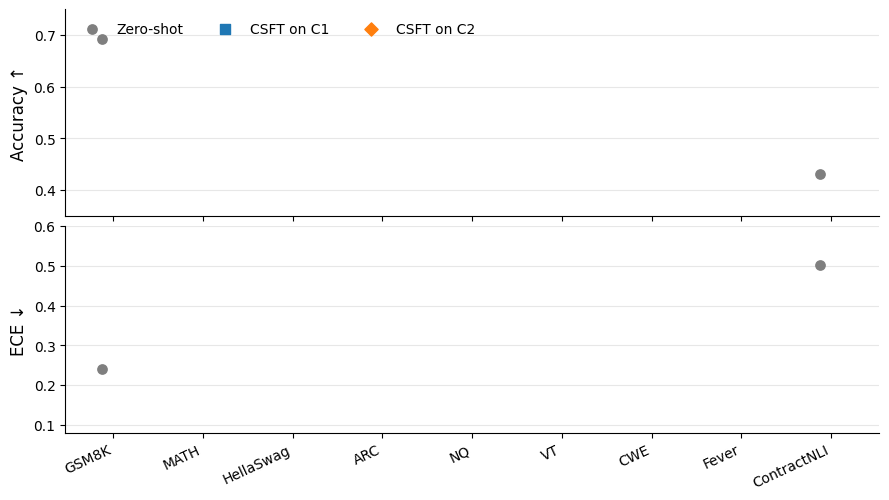

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Style (paper-friendly)
# -------------------------
plt.rcParams.update({
    "font.size": 11,
    "axes.labelsize": 12,
    "axes.titlesize": 13,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

# -------------------------
# Tasks & Methods
# -------------------------
tasks = [
    "GSM8K", "MATH", "HellaSwag", "ARC",
    "NQ", "VT", "CWE", "Fever", "ContractNLI"
]
methods = ["Zero-shot", "CSFT on C1", "CSFT on C2"]

colors = {
    "Zero-shot": "tab:gray",
    "CSFT on C1": "tab:blue",
    "CSFT on C2": "tab:orange",
}
markers = {
    "Zero-shot": "o",
    "CSFT on C1": "s",
    "CSFT on C2": "D",
}

# -------------------------
# Dummy data (REPLACE)
# shape: [num_tasks, num_methods]
# -------------------------
acc = np.array([
    [0.6921, 0.00, 0.00], # gsm8k
    [0.00, 0.00, 0.00], # math
    [0.00, 0.00, 0.00], # mmlu
    [0.00, 0.00, 0.00], # niah
    [0.00, 0.00, 0.00], # vt
    [0.00, 0.00, 0.00], # cwe
    [0.00, 0.00, 0.00], # fwe
    [0.00, 0.00, 0.00], # qa
    [0.4308, 0.00, 0.00], # contractnli
])

ece = np.array([
    [0.2412, 0.00, 0.00], # gsm8k
    [0.00, 0.00, 0.00], # math
    [0.00, 0.00, 0.00], # mmlu
    [0.00, 0.00, 0.00], # niah
    [0.00, 0.00, 0.00], # vt
    [0.00, 0.00, 0.00], # cwe
    [0.00, 0.00, 0.00], # fwe
    [0.00, 0.00, 0.00], # qa
    [0.5021, 0.00, 0.00], # contractnli
])

# -------------------------
# Plot
# -------------------------
fig, axes = plt.subplots(
    2, 1, figsize=(10.5, 5.5),
    sharex=True,
    gridspec_kw={"hspace": 0.05}
)

x = np.arange(len(tasks))
jitter = [-0.12, 0.0, 0.12]

# ---- ACC (top) ----
ax = axes[0]
for i, m in enumerate(methods):
    ax.scatter(
        x + jitter[i],
        acc[:, i],
        s=45,
        marker=markers[m],
        color=colors[m],
        label=m,
        zorder=3,
    )

ax.set_ylabel("Accuracy ↑")
ax.set_ylim(0.35, 0.75)
ax.grid(axis="y", alpha=0.3)
ax.legend(frameon=False, ncol=3, loc="upper left")

# ---- ECE (bottom) ----
ax = axes[1]
for i, m in enumerate(methods):
    ax.scatter(
        x + jitter[i],
        ece[:, i],
        s=45,
        marker=markers[m],
        color=colors[m],
        zorder=3,
    )

ax.set_ylabel("ECE ↓")
ax.set_ylim(0.08, 0.6)
ax.grid(axis="y", alpha=0.3)

ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=25, ha="right")

# -------------------------
# Finalize
# -------------------------
plt.tight_layout()
plt.show()
